In [ ]:
import random as rd
import os
import tensorflow as tf
from tensorflow.keras import layers
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Plot the validation and training data separately
def plot_loss_curves(history,model_name,savefig):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  if(savefig):
    os.makedirs("./Graph/"+model_name+"/",exist_ok=True)
    plt.savefig("./Graph/"+model_name+"/"+"Loss"+".png")
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
  if(savefig):
    plt.savefig("./Graph/"+model_name+"/"+"Accuracy"+".png")

In [3]:
def make_confusion_matrix(y_true, y_pred,file_name,classes=None, figsize=(10, 10), text_size=15, norm=False,savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm =tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    os.makedirs("./Graph/Confusion_Matrix/",exist_ok=True)
    fig.savefig("./Graph/Confusion_Matrix/"+file_name+".png")

In [ ]:
#path
data_dir="./Data/"
train_dir=data_dir+"train/"
val_dir=data_dir+"val/"
test_dir=data_dir+"test/"

In [ ]:
model_name="CNN_1"
class_name=os.listdir(train_dir)
print(class_name)

['Grassy', 'Marshy', 'Rocky', 'Sandy']


In [ ]:
# No of Images
sum=0
print("Train")
for dirpath, dirnames, filenames in os.walk(train_dir):
    print("There are ", len(dirnames),"folders and",len(filenames),"images in ", dirpath)
    sum=sum+len(filenames)
print("No of images in train=",sum,"\n")

sum=0
print("Val")
for dirpath, dirnames, filenames in os.walk(val_dir):
    print("There are ", len(dirnames),"folders and",len(filenames),"images in ", dirpath)
    sum=sum+len(filenames)
print("No of images in val=",sum,"\n")

sum=0
print("Test")
for dirpath, dirnames, filenames in os.walk(test_dir):
    print("There are ", len(dirnames),"folders and",len(filenames),"images in ", dirpath)
    sum=sum+len(filenames)
print("No of images in test=",sum,"\n")

Train
There are  4 folders and 0 images in  ./Data/train/
There are  0 folders and 8512 images in  ./Data/train/Grassy
There are  0 folders and 7727 images in  ./Data/train/Marshy
There are  0 folders and 7668 images in  ./Data/train/Rocky
There are  0 folders and 7664 images in  ./Data/train/Sandy
No of images in train= 31571 

Val
There are  4 folders and 0 images in  ./Data/val/
There are  0 folders and 1824 images in  ./Data/val/Grassy
There are  0 folders and 1656 images in  ./Data/val/Marshy
There are  0 folders and 1643 images in  ./Data/val/Rocky
There are  0 folders and 1642 images in  ./Data/val/Sandy
No of images in val= 6765 

Test
There are  4 folders and 0 images in  ./Data/test/
There are  0 folders and 1824 images in  ./Data/test/Grassy
There are  0 folders and 1657 images in  ./Data/test/Marshy
There are  0 folders and 1644 images in  ./Data/test/Rocky
There are  0 folders and 1644 images in  ./Data/test/Sandy
No of images in test= 6769 



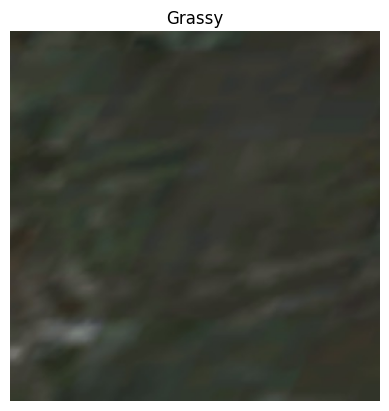

In [ ]:
#Visualize image
label=class_name[rd.randint(0,len(class_name)-1)]
img_name=os.listdir(train_dir+label+"/")[rd.randint(0,len(os.listdir(train_dir+label))-1)]
img_file=train_dir+label+"/"+img_name
img=plt.imread(img_file)
plt.imshow(img)
plt.title(label)
plt.axis('off');

In [ ]:
# Rescale the data and create data generator instances
IMG =(128,128)
print(IMG)
# Load data in from directories and turn it into batches
train_data =tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                image_size=IMG,
                                                                batch_size=32,
                                                                label_mode='categorical') # changed to categorical

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                               image_size=IMG,
                                                               batch_size=32,
                                                               label_mode='categorical')
test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size=IMG,
                                                               batch_size=32,
                                                               label_mode='categorical')

(128, 128)
Found 31571 files belonging to 4 classes.
Found 6765 files belonging to 4 classes.
Found 6769 files belonging to 4 classes.


In [ ]:
base_model= tf.keras.Sequential([
  layers.Conv2D(2, 3, activation='relu', input_shape=(128,128,3)),

  # layers.Conv2D(64, 3, activation='relu'),
  # layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
  #           padding="valid"), # padding can also be 'same'

  # layers.Conv2D(32, 3, activation='relu'),

  # layers.Conv2D(64, 3, activation='relu'),
  # layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
  #           padding="valid"), # padding can also be 'same'

  # layers.Conv2D(32, 3, activation='relu'),

  # layers.Conv2D(64, 3, activation='relu'),
  # layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
  #           padding="valid"), # padding can also be 'same'
  layers.Flatten(),
  layers.Dense(len(class_name), activation='softmax')
])
# Compile the model
base_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])

In [ ]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 2)       56        
                                                                 
 flatten_1 (Flatten)         (None, 31752)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 127012    
                                                                 
Total params: 127,068
Trainable params: 127,068
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Call back
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
# Setup checkpoint path
checkpoint_path = "./Checkpoint/"+model_name+"/checkpoint.ckpt"

es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min)

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # set to True to save only the best model instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)



# Fit the model saving checkpoints every epoch
initial_epochs=30
history=base_model.fit(train_data,
                                          epochs=initial_epochs,
                                          validation_data=val_data,
                                          validation_steps=int(len(val_data)), # do less steps per validation (quicker)
                                          callbacks=[checkpoint_callback, es])

Epoch 1/30


987/987 [==============================] - ETA: 0s - loss: 70.0958 - accuracy: 0.3873
Epoch 1: val_loss improved from inf to 2.23900, saving model to ./Checkpoint/CNN_1\checkpoint.ckpt
987/987 [==============================] - 691s 696ms/step - loss: 70.0958 - accuracy: 0.3873 - val_loss: 2.2390 - val_accuracy: 0.4609
Epoch 2/30
986/987 [============================>.] - ETA: 0s - loss: 2.0417 - accuracy: 0.4509
Epoch 2: val_loss improved from 2.23900 to 1.55389, saving model to ./Checkpoint/CNN_1\checkpoint.ckpt
987/987 [==============================] - 120s 121ms/step - loss: 2.0415 - accuracy: 0.4508 - val_loss: 1.5539 - val_accuracy: 0.4182
Epoch 3/30
987/987 [==============================] - ETA: 0s - loss: 1.4675 - accuracy: 0.4539
Epoch 3: val_loss did not improve from 1.55389
987/987 [==============================] - 137s 138ms/step - loss: 1.4675 - accuracy: 0.4539 - val_loss: 1.6997 - val_accuracy: 0.4105
Epoch 4/30
986/987 [============================>.] - ETA: 0s - los

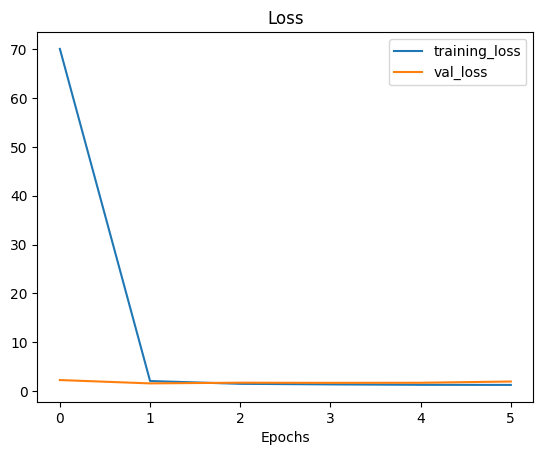

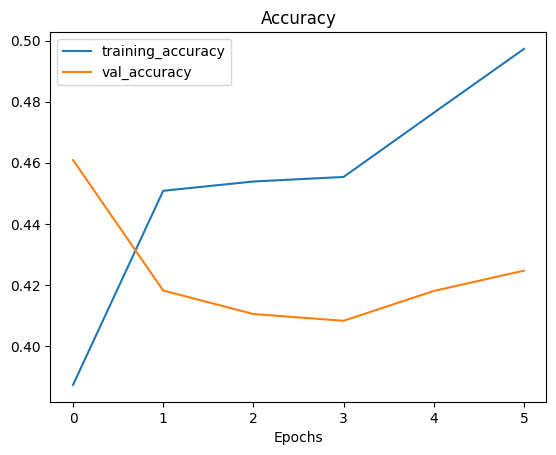

In [ ]:
plot_loss_curves(history,model_name,savefig=True)

1/1 [==============================] - 0s 43ms/step


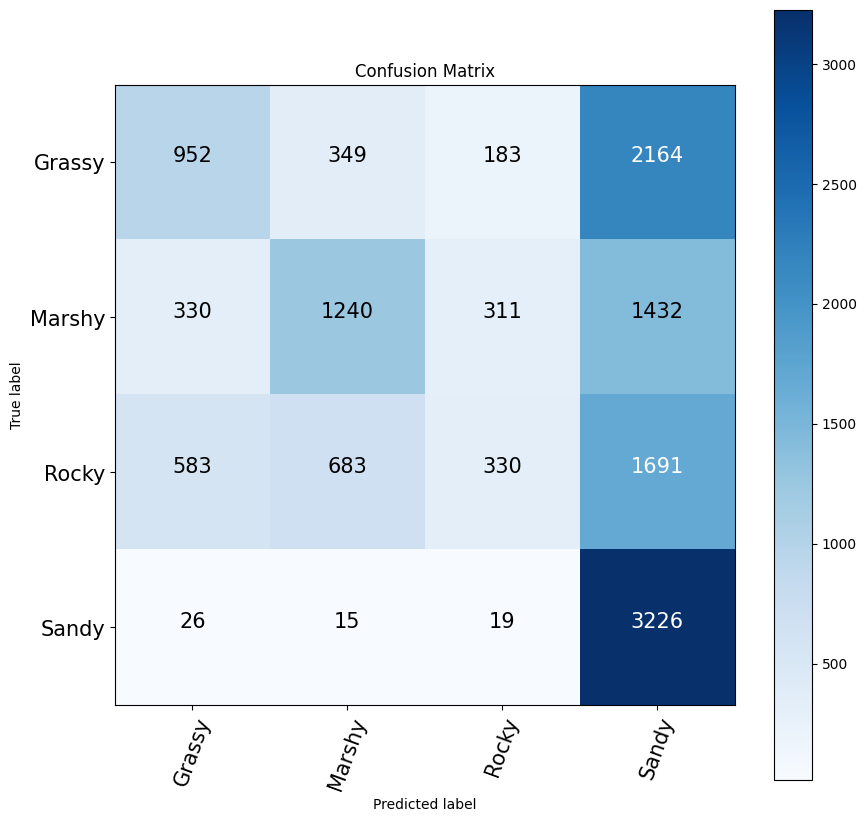

In [ ]:
predictions = np.array([])
label =  np.array([])

for x, y in test_data:
  predictions = np.concatenate([predictions, np.argmax(base_model.predict(x), axis = -1)])
  label = np.concatenate([label, np.argmax(y.numpy(), axis=-1)])

for x, y in val_data:
  predictions = np.concatenate([predictions, np.argmax(base_model.predict(x), axis = -1)])
  label = np.concatenate([label, np.argmax(y.numpy(), axis=-1)])

# os.makedirs("./Graph/Confusion_Matrix",exist_ok=True)
make_confusion_matrix(y_true=label, y_pred=predictions,file_name=model_name,classes=class_name, figsize=(10, 10), text_size=15, norm=False,savefig=True)

In [ ]:
os.makedirs("./Model/",exist_ok=True)
base_model.save("./Model/"+model_name+".h5")